# PROBLEM STATEMENT
You are a Data scientist at the Forest bank, and the bank has been facing a number of fraudulent transactions. Fradulent transaction are those which are not done by the user itself but by a hacker or by a card thief or by doing a fishing attack. The bank has a huge dataset of it's credit card users and the bank has also done the job of marking these transactions as fraudulent or not. You being banks' Data science expert have been given the task to first analyse this data and generate insights and then predict if a transaction on a credit card is going to be fraud or not.


# IMPORT LIBRARIES 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

# UNDERSTAND DATASET

In [2]:
train_data= pd.read_csv("fraudTrain.csv")
test_data=pd.read_csv("fraudTest.csv")

# Data Dictionary

- **transdatetrans_time:** The date and time of the transaction.

- **cc_num:** credit card number.

- **merchant:** Merchant who was getting paid.

- **category:** In what area does that merchant deal.

- **amt:** Amount of money in American Dollars.

- **first:** first name of the card holder.

- **last:** last name of the card holder.

- **gender:** Gender of the cardholder.Just male and female!

- **street:** Street of card holder residence

- **city:** city of card holder residence

- **state:** state of card holder residence

- **zip:** ZIP code of card holder residence

- **lat:** latitude of card holder

- **long:** longitude of card holder

- **city_pop:** Population of the city

- **job:** trade of the card holder

- **dob:** Date of birth of the card holder

- **trans_num:** Transaction ID

- **unix_time:** Unix time which is the time calculated since 1970 to today.

- **merch_lat:** latitude of the merchant

- **merch_long:** longitude of the merchant

- **is_fraud:** Whether the transaction is fraud(1) or not(0)

In [3]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [6]:
train_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

# Data Cleaning 

Data cleaning by removing all unimportant columns that cotnains personal information and missing values

In [7]:
columns_to_drop = ["Unnamed: 0","trans_date_trans_time","cc_num","first","last",'street','zip','lat','long','dob','trans_num','unix_time','merch_lat','merch_long']
train_data = train_data.drop(columns=columns_to_drop)
#'category','gender','job','merchant','amt', 'city','city_pop','state','is_fraud
#columns_to_drop =["Unamed: 0 ","trans_date_trans_time","cc_num","first","last",'street','zip','lat','long','dob','trans_num','unix_time','merch_lat','merch_long']
#columns_to_drop = ['trans_date_trans_time',"cc_num","first","last"]

In [8]:
columns_to_drop = ["Unnamed: 0","trans_date_trans_time","cc_num","first","last",'street','zip','lat','long','dob','trans_num','unix_time','merch_lat','merch_long']
test_data = test_data.drop(columns=columns_to_drop)

In [9]:
train_data.head()

,merchant,category,amt,gender,city,state,city_pop,job,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,3495,"Psychologist, counselling",0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,149,Special educational needs teacher,0
2,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,4154,Nature conservation officer,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,1939,Patent attorney,0
4,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,99,Dance movement psychotherapist,0


In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   merchant  555719 non-null  object 
 1   category  555719 non-null  object 
 2   amt       555719 non-null  float64
 3   gender    555719 non-null  object 
 4   city      555719 non-null  object 
 5   state     555719 non-null  object 
 6   city_pop  555719 non-null  int64  
 7   job       555719 non-null  object 
 8   is_fraud  555719 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 38.2+ MB


In [11]:
train_data.shape

(1296675, 9)

There are overall total 1296675 rows and 9 columns in train dataset

In [12]:
test_data.shape

(555719, 9)

There are overall total 555719 rows and 9 columns in train dataset.

In [13]:
train_data.isna().sum()

merchant    0
category    0
amt         0
gender      0
city        0
state       0
city_pop    0
job         0
is_fraud    0
dtype: int64

In [14]:
test_data.isna().sum()

merchant    0
category    0
amt         0
gender      0
city        0
state       0
city_pop    0
job         0
is_fraud    0
dtype: int64

There are no null values present in dataset. Hence, there is no need to perform missing value treatment.

In [15]:
train_data.columns

Index(['merchant', 'category', 'amt', 'gender', 'city', 'state', 'city_pop',
       'job', 'is_fraud'],
      dtype='object')

# EXPLORATORY DATA ANALYSIS

<Figure size 1500x200 with 0 Axes>

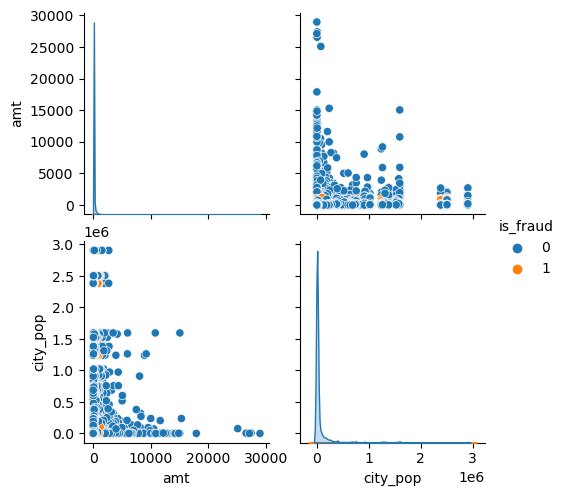

In [16]:
plt.figure(figsize=(15,2))
sns.pairplot(train_data[['category', 'gender', 'job', 'merchant', 'amt', 'city', 'city_pop', 'state', 'is_fraud']], hue='is_fraud')
plt.show()

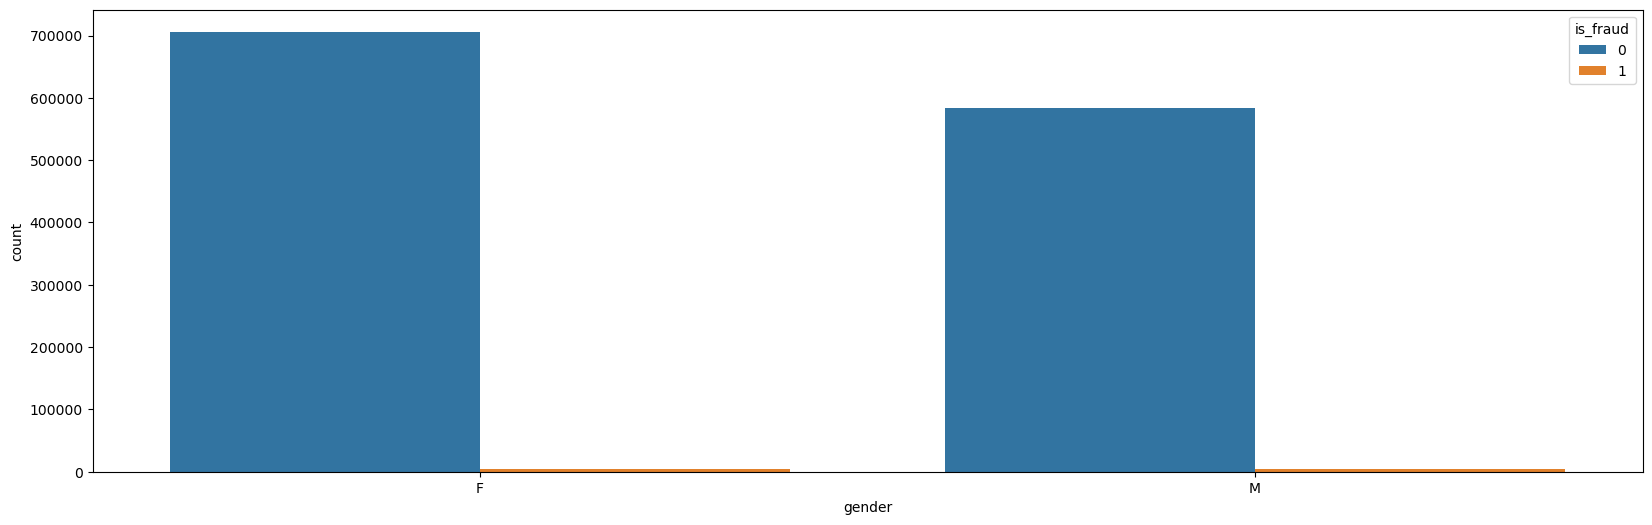

In [17]:
plt.figure(figsize=(20,6))
sns.countplot(data=train_data, x = 'gender',hue='is_fraud')
plt.show()

<Axes: >

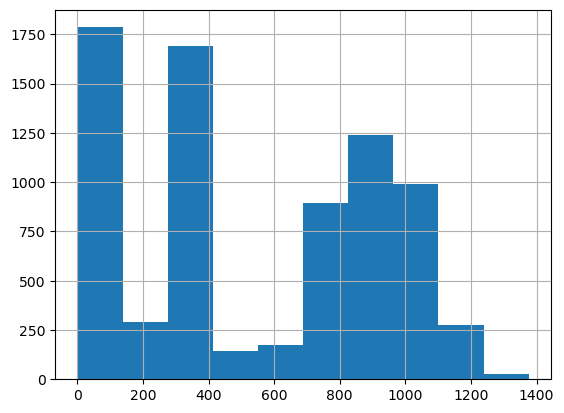

In [18]:
train_data[train_data.is_fraud==1]['amt'].hist()

As can be seen in the histogram, around 1750+ fraudulent transactions were in the bucket 0-100 dollars and least on the 1200-1400 dollars bucket

# ENCODING

In [19]:
numerical = []
categorical = []
for i in train_data.columns:
    if train_data[i].dtype == 'int64' or train_data[i].dtype == 'float64':
        numerical.append(i)
    else:
        categorical.append(i)
    

In [20]:
numerical_test = []
categorical_test = []
for i in test_data.columns:
    if test_data[i].dtype == 'int64' or test_data[i].dtype == 'float64':
        numerical_test.append(i)
    else:
        categorical_test.append(i)

In [21]:
binary_cols = []
for col in train_data.select_dtypes(include=['int', 'float']).columns:
    unique_values = train_data[col].unique()
    if np.in1d(unique_values, [0, 1]).all():
        binary_cols.append(col)
        

In [22]:
numerical = [i for i in numerical if i not in binary_cols]

In [23]:
binary_cols_test = []
for col in train_data.select_dtypes(include=['int', 'float']).columns:
    unique_values = train_data[col].unique()
    if np.in1d(unique_values, [0, 1]).all():
        binary_cols_test.append(col)

In [24]:
numerical_test = [i for i in numerical if i not in binary_cols]

In [25]:
for i in categorical:
        train_data[i] = train_data[i].astype('category')
        train_data[i] = train_data[i].cat.codes

In [26]:
for i in categorical_test:
        test_data[i] = test_data[i].astype('category')
        test_data[i] = test_data[i].cat.codes

# FEATURE SCALING

In [27]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
train_data[numerical] = sc_x.fit_transform(train_data[numerical])



In [28]:
sc_x = StandardScaler()
test_data[numerical] = sc_x.fit_transform(test_data[numerical_test])

In [29]:
test_data.head()

,merchant,category,amt,gender,city,state,city_pop,job,is_fraud
0,319,10,-0.424463,1,157,39,0.816521,275,0
1,591,10,-0.252337,0,16,43,-0.292685,392,0
2,611,5,-0.179353,0,61,33,-0.178853,259,0
3,222,9,-0.059605,1,764,8,-0.111371,407,0
4,292,13,-0.422358,1,247,21,-0.289942,196,0


In [30]:
train_data.head()

,merchant,category,amt,gender,city,state,city_pop,job,is_fraud
0,514,8,-0.407826,0,526,27,-0.282589,370,0
1,241,4,0.230039,0,612,47,-0.293670,428,0
2,390,0,0.934149,1,468,13,-0.280406,307,0
3,360,2,-0.158132,1,84,26,-0.287742,328,0
4,297,9,-0.177094,1,216,45,-0.293835,116,0


# CLASSIFICATIONS MODEL TO PREDICT FRAUDLENT OR NOT

In [31]:
x_train = train_data.drop('is_fraud', axis=1)
y_train = train_data['is_fraud']

In [32]:
x_test = test_data.drop('is_fraud', axis=1)
y_test = test_data['is_fraud']

# MODEL 1: LOGISTIC REGRESSION

In [33]:
logistic_reg = LogisticRegression()
logistic_reg.fit(x_train, y_train)
y_pred_logistic = logistic_reg.predict(x_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"Logistic Regression Accuracy: {accuracy_logistic:}")

Logistic Regression Accuracy: 0.9955139198047934


# MODEL 2:KNN

In [34]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"K-Nearest Neighbors Accuracy: {accuracy_knn:}")

K-Nearest Neighbors Accuracy: 0.9958540197473903


In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test, y_pred_knn)

In [36]:
cm_disp= ConfusionMatrixDisplay(confusion_matrix=cm)

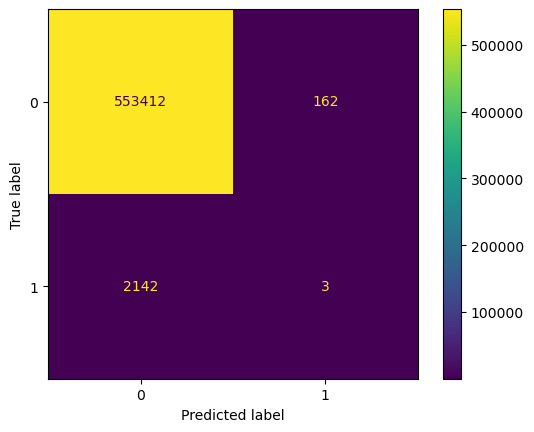

In [37]:
cm_disp.plot()

In [38]:
from sklearn.metrics import classification_report, accuracy_score, log_loss

In [39]:
target_names= ["Negative(0)","Positive(1)"]
# Classification Report
print(classification_report(y_test,knn.predict(x_test),target_names=target_names))

              precision    recall  f1-score   support

 Negative(0)       1.00      1.00      1.00    553574
 Positive(1)       0.02      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.51      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



In [40]:
accuracy_score(y_test, y_pred_knn)

0.9958540197473903

# MODEL 3: DECISION TREE

In [41]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
y_pred_tree = decision_tree.predict(x_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Accuracy: {accuracy_tree:}")

Decision Tree Accuracy: 0.9958810118063266


In [42]:
cm_dt= confusion_matrix(y_test, y_pred_tree)

In [43]:
cm_disp= ConfusionMatrixDisplay(confusion_matrix=cm_dt)

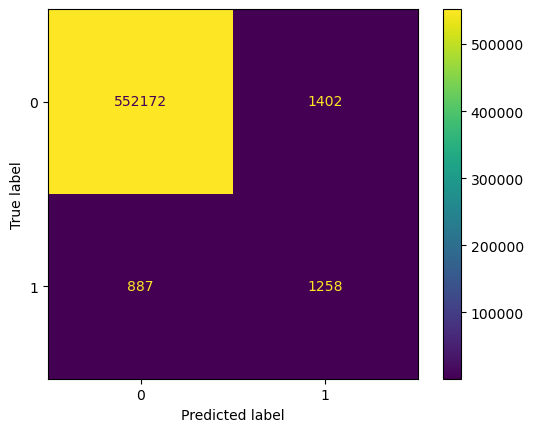

In [44]:
cm_disp.plot()

In [45]:
target_names= ["Negative(0)","Positive(1)"]
# Classification Report
print(classification_report(y_test,decision_tree.predict(x_test),target_names=target_names))

              precision    recall  f1-score   support

 Negative(0)       1.00      1.00      1.00    553574
 Positive(1)       0.47      0.59      0.52      2145

    accuracy                           1.00    555719
   macro avg       0.74      0.79      0.76    555719
weighted avg       1.00      1.00      1.00    555719



In [46]:
accuracy_score(y_test, y_pred_tree)

0.9958810118063266

# MODEL 4: RANDOM FOREST

In [47]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)
y_pred_forest = random_forest.predict(x_test)
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print(f"Random Forest Accuracy: {accuracy_forest:}")

Random Forest Accuracy: 0.9976444929901623


In [48]:
cm_rf= confusion_matrix(y_test, y_pred_forest)

In [49]:
cm_disp= ConfusionMatrixDisplay(confusion_matrix=cm_rf)

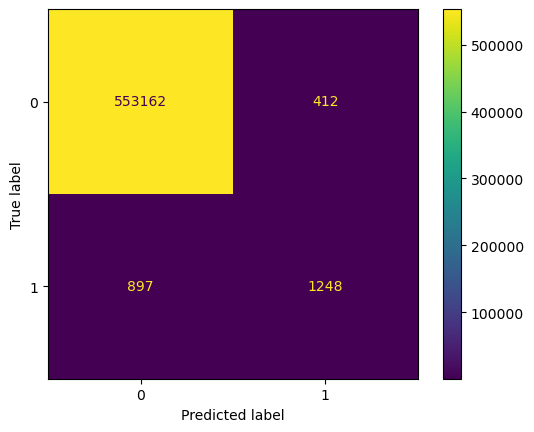

In [50]:
cm_disp.plot()

In [51]:
target_names= ["Negative(0)","Positive(1)"]
# Classification Report
print(classification_report(y_test,random_forest.predict(x_test),target_names=target_names))

              precision    recall  f1-score   support

 Negative(0)       1.00      1.00      1.00    553574
 Positive(1)       0.75      0.58      0.66      2145

    accuracy                           1.00    555719
   macro avg       0.88      0.79      0.83    555719
weighted avg       1.00      1.00      1.00    555719



In [52]:
accuracy_score(y_test, y_pred_forest)

0.9976444929901623

# MODEL 5: SVM

In [53]:
svm = SVC()
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:}")

SVM Accuracy: 0.9961401355721147


In [54]:
cm_svm= confusion_matrix(y_test, y_pred_svm)


In [55]:
cm_disp= ConfusionMatrixDisplay(confusion_matrix=cm_svm)

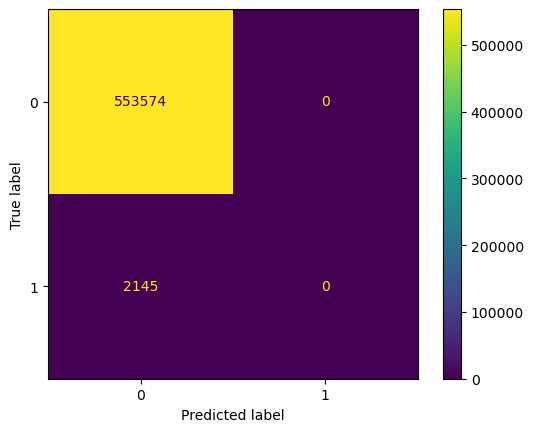

In [56]:
cm_disp.plot()

In [57]:
target_names= ["Negative(0)","Positive(1)"]
# Classification Report
print(classification_report(y_test,svm.predict(x_test),target_names=target_names))

              precision    recall  f1-score   support

 Negative(0)       1.00      1.00      1.00    553574
 Positive(1)       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



In [58]:
accuracy_score(y_test, y_pred_svm)

0.9961401355721147

 **All the 5 Models are giving excellent results with more than 99% of accuracy and hence there is no need of tuning any parameter.**